In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv("C:/Users/HP/Downloads/flightdata.csv")

In [4]:
data.shape

(11231, 26)

In [5]:
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [6]:
data=data.drop('Unnamed: 25',axis=1)

In [7]:
data['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

<AxesSubplot:xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

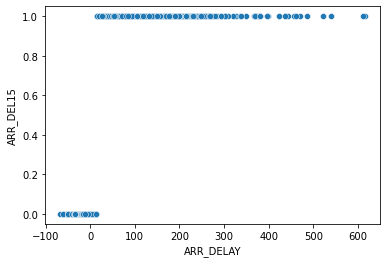

In [8]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=data)

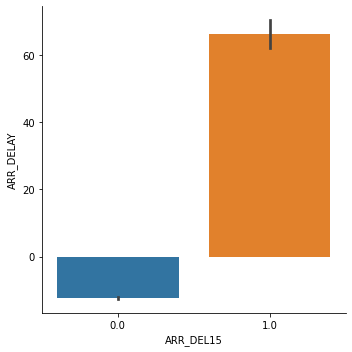

In [9]:
sns.catplot(x='ARR_DEL15',y='ARR_DELAY',kind='bar',data=data)

<AxesSubplot:>

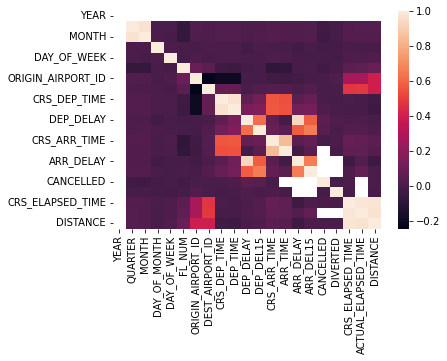

In [10]:
sns.heatmap(data.corr())

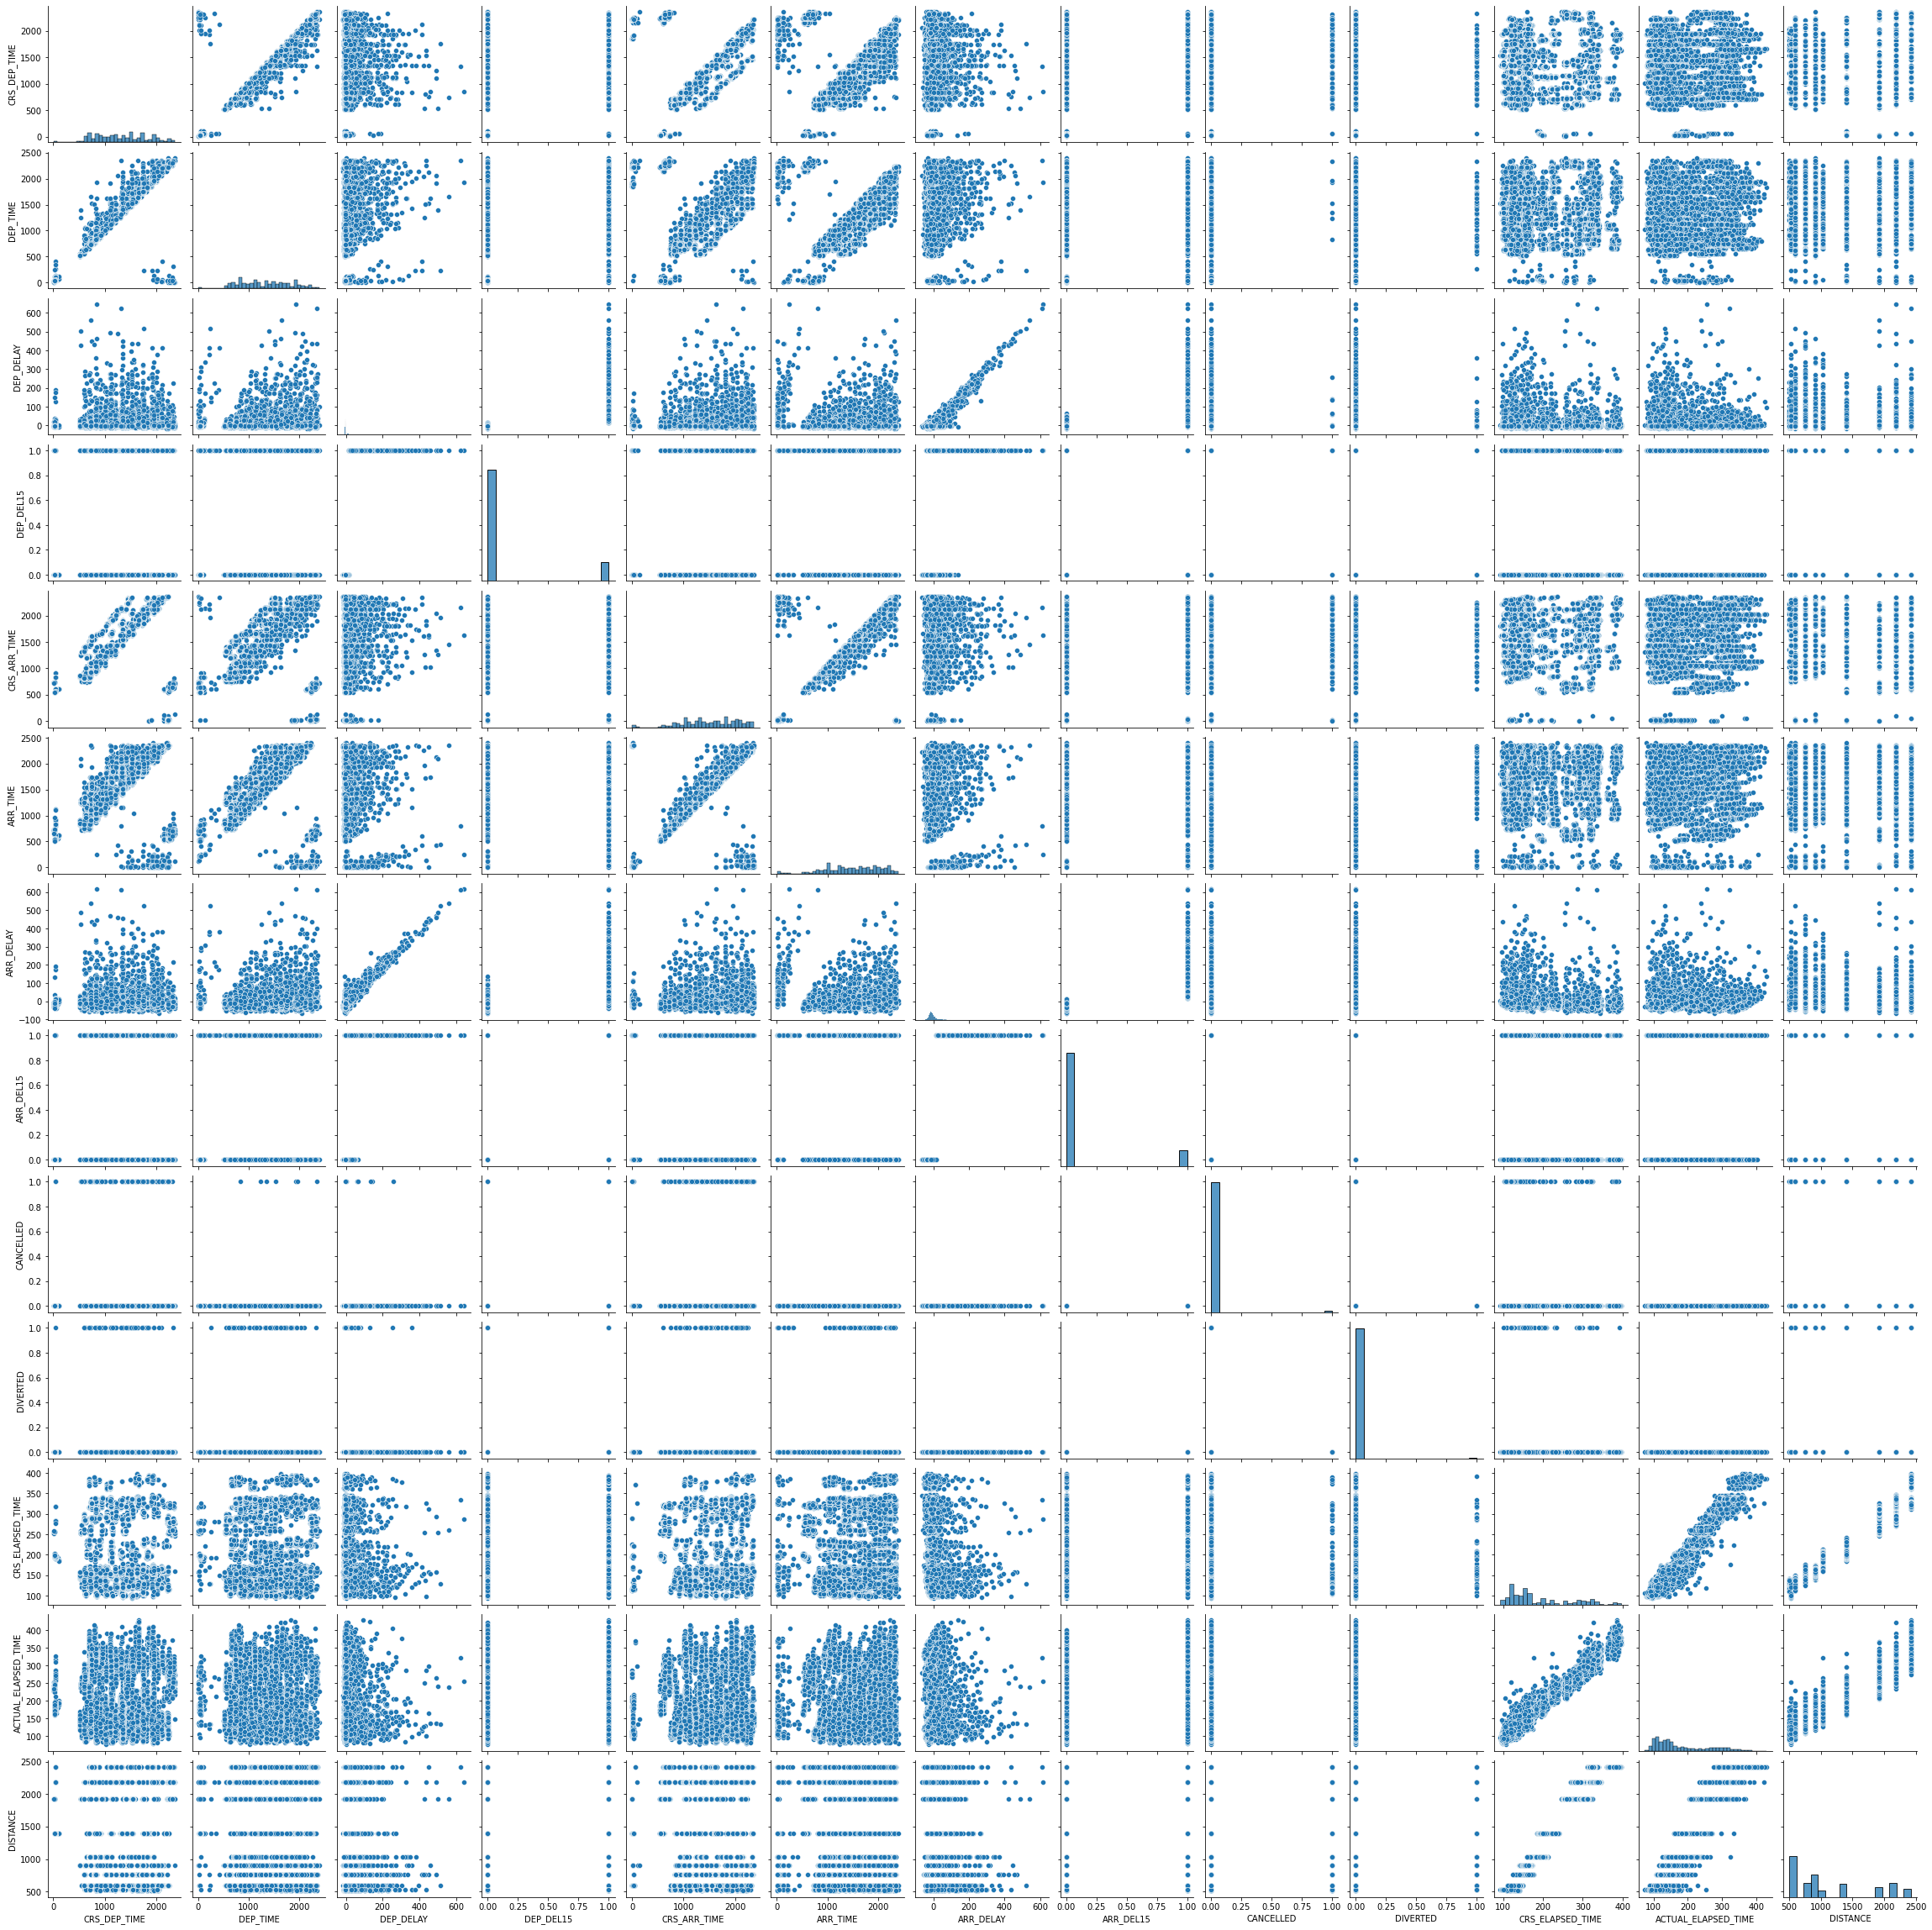

In [11]:
sns.pairplot(data.iloc[:, 12:])
plt.show()

In [12]:
datas=data[["MONTH","DAY_OF_MONTH","DAY_OF_WEEK","FL_NUM","ORIGIN","DEST","DEP_DEL15","CRS_ARR_TIME","ARR_DEL15"]]
datas.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
FL_NUM            0
ORIGIN            0
DEST              0
DEP_DEL15       107
CRS_ARR_TIME      0
ARR_DEL15       188
dtype: int64

In [13]:
datas=datas.fillna({'ARR_DEL15':1})
datas=datas.fillna({'DEP_DEL15':0})
datas.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
177,1,9,6,2834,MSP,SEA,0.0,852,1.0
178,1,9,6,2839,DTW,JFK,0.0,1724,0.0
179,1,10,7,86,MSP,DTW,0.0,1632,1.0
180,1,10,7,87,DTW,MSP,1.0,1649,0.0
181,1,10,7,423,JFK,ATL,0.0,1600,0.0
182,1,10,7,440,JFK,ATL,0.0,849,0.0
183,1,10,7,485,JFK,SEA,1.0,1945,0.0
184,1,10,7,557,MSP,DTW,0.0,912,1.0


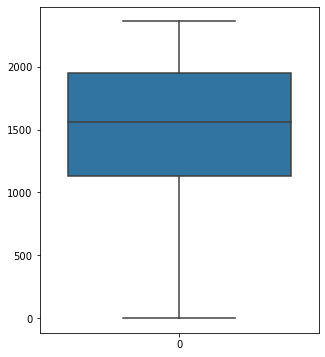

In [14]:
outlier= plt.subplots(figsize=(5, 6))
sns.boxplot(data=datas['CRS_ARR_TIME'])
plt.show()

In [15]:
x=datas.iloc[:,0:8].values
y=datas.iloc[:,8:9].values

In [16]:
from sklearn.preprocessing import OneHotEncoder
s=OneHotEncoder()
z=s.fit_transform(x[:,4:5]).toarray()
a=s.fit_transform(x[:,5:6]).toarray()

In [17]:
data=pd.get_dummies(datas)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [19]:
def func(x,y):
    x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =42)
    rmse=[]
    S=[]
    #Linear regression
    model=LinearRegression().fit(x_train,y_train)
    y_predicted1=model.predict(x_test)
    S.append(model.score(x_test,y_test))
    rmse.append(mean_squared_error(y_test,y_predicted1,squared=False))
    #DecisionTreeRegression
    model1=DecisionTreeRegressor().fit(x_train,y_train)
    y_predicted2=model1.predict(x_test)
    S.append(model1.score(x_test,y_test))
    rmse.append(mean_squared_error(y_test,y_predicted2,squared=False))
    #RandomForestRegressor
    model2=RandomForestRegressor(n_estimators=100,max_depth=2).fit(x_train,y_train)
    y_predicted3=model2.predict(x_test)
    S.append(model2.score(x_test,y_test))
    rmse.append(mean_squared_error(y_test,y_predicted3,squared=False))
    #GradientBoostingRegressor
    model3=GradientBoostingRegressor(n_estimators=100,max_depth=2).fit(x_train,y_train)
    y_predicted4=model3.predict(x_test)
    S.append(model3.score(x_test,y_test))
    rmse.append(mean_squared_error(y_test,y_predicted4,squared=False))
    #AdaBoostRegressor
    model4 = AdaBoostRegressor().fit(x_train,y_train)
    y_predicted5=model4.predict(x_test)
    S.append(model4.score(x_test,y_test))
    rmse.append(mean_squared_error(y_test,y_predicted5,squared=False))
    # XGBoost model
    model5 = XGBRegressor().fit(x_train, y_train)
    y_predicted6=model5.predict(x_test)
    S.append(model5.score(x_test,y_test))
    rmse.append(mean_squared_error(y_test,y_predicted6,squared=False))
    print("score=",S)
    return rmse
result=[]
name=['LINEAR REGRESSION', 'DECISION TREE REGRESSION', 'RANDOM FOREST REGRESSION', 'GRADIENT BOOSTING REGRESSION', 'ADABOOST REGRESSION','XGBOOST']
result=func(x,y)
print(result)
print('\033[1m',name[result.index(min(result))],"is the best fit model with a RMSE of ",min(result),'\033[0m')

ValueError: could not convert string to float: 'DTW'

In [ ]:
model5 =XGBRegressor().fit(x_train, y_train)
y_predicted6=model5.predict(x_test)
#S.append(model5.score(x_test,y_test)
rmse=mean_squared_error(y_test,y_predicted6,squared=False)

In [ ]:
print(rmse)

In [ ]:
model5.score(x_test,y_test)